# Implement the Kuramoto Order parameter from spiking data

### Compute individual phase

$$
\phi_j(t) = 2\pi \frac{t - t_s^j}{t^j_{s+1} - t^j_s},\\
$$
$t_s < t < t_{s+1}$, and $\phi\in\{0,2\pi\}$. Where $t$ is time, and $t_s$ the spike time of the $j$ neuron.

### Kuramoto order parameter (r)

$$
r(t) = \Big|\frac{1}{N} \sum_{j=1}^N {\rm e}^{i\phi_j(t)}\Big|,
$$

or

$$
\overline{r} = \Big< \Big| \frac{1}{N} \sum_{j=1}^N {\rm e}^{i\phi_j} \Big|\Big>,
$$

$r\in\{0,1\}$.

In [1]:
import os
import sys
sys.path.append(r"../")
import numpy as np
import matplotlib.pyplot as plt
# from nodes.HR import HR
from nodes.HH import HH
from connect.ws_small_world import create_sw
from synapse.synapse import synbase
from utils.statistics import cal_cv, cal_synFactor, cal_kop
from utils.utils import spikevent
from utils.utils_plot import plot_firing_raster

In [2]:
seed = 0
np.random.seed(seed)                # 给numpy设置随机种子

In [3]:
N = 100
dt = 0.01
pre = HH(N=N)
post = pre
# post = HH(N=N)

In [4]:
Num = int(N)
conn = create_sw(Num, 2, 0.5)
syn = synbase(pre, post, conn=conn, synType="electr")   # ["electr", "chem_Alpha"]

In [5]:
# 初始化神经元
time = []
mem = []
for i in range(10000):
    pre()
    # post()
    time.append(pre.t)
# mem = np.array(mem)

In [6]:
syn.w = .001

In [7]:
for i in range(10000):
    syn()

In [8]:
Tn = 100000
R = cal_synFactor(Tn, Num)
kop = cal_kop(dt)

# 计算统计量

In [9]:
time = []
mem = []
for i in range(Tn):
    # 使用泊松过程测试CV
    pre.Iex=0 
    pre.Iex=(np.random.rand(N)<0.1).astype(float)*100

    syn()
    R(pre.mem)
    kop(pre.flaglaunch, syn.t)
    time.append(syn.t)
    mem.append(syn.post.mem.copy())

In [10]:
kuramoto_mean, kuramoto, phase = kop.return_kop()

In [11]:
kuramoto_mean

0.1006258816981005

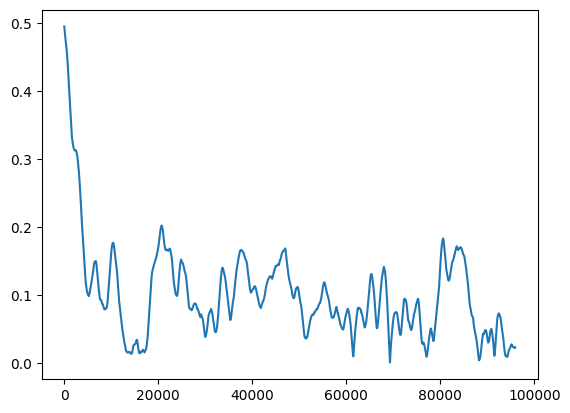

In [12]:
plt.plot(kuramoto)

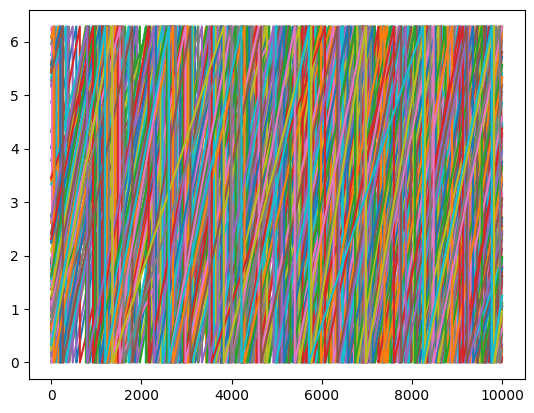

In [13]:
for k in range(phase.shape[0]):
    plt.plot(phase[k][0:10000])

In [14]:
R.return_syn()

0.016068752989378966

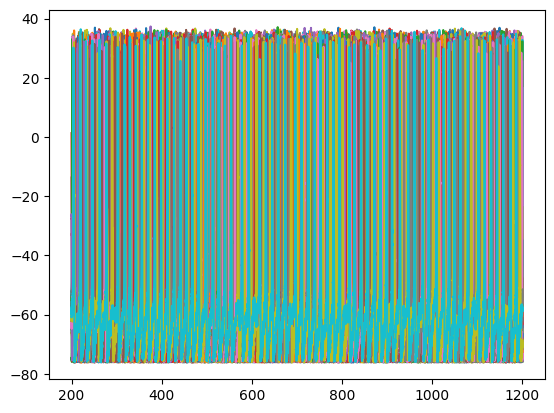

In [15]:
plt.plot(time, mem)